
DESKRIPSI DATASET
✓ Folder output ditemukan: D:\coursera-assigment\Course 2 - SL Regresi\result\

Dataset berhasil dimuat!
Jumlah baris: 1460
Jumlah kolom: 81

INFORMASI DATASET:
----------------------------------------------------------------------
Jumlah observasi: 1460
Jumlah fitur: 80
Target variable: SalePrice (Harga Jual Rumah dalam USD)

5 Data Pertama:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ... 

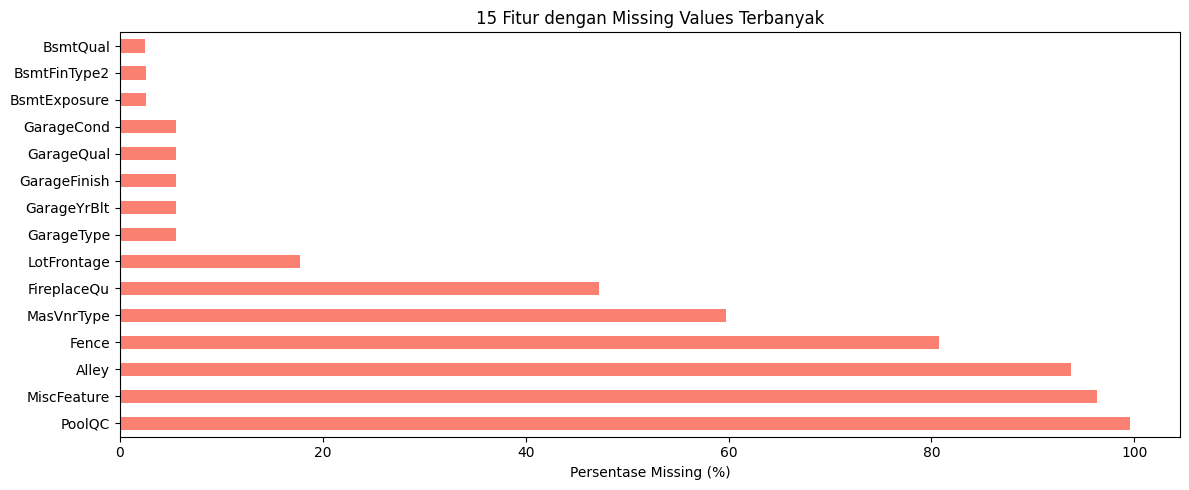


✓ Visualisasi missing values disimpan!


In [1]:
# ========================================
# SUPERVISED LEARNING REGRESSION PROJECT
# House Prices Prediction
# ========================================

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ========================================
# DESKRIPSI DATASET
# ========================================

print("\n" + "="*70)
print("DESKRIPSI DATASET")
print("="*70)

# Path ke dataset dan output
file_path = 'D:\\coursera-assigment\\house_prices_dataset\\train.csv'
output_path = 'D:\\coursera-assigment\\Course 2 - SL Regresi\\result\\'

# Verifikasi folder output
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"✓ Folder output dibuat: {output_path}")
else:
    print(f"✓ Folder output ditemukan: {output_path}")

df = pd.read_csv(file_path)

print("\nDataset berhasil dimuat!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Informasi Dataset
print("\nINFORMASI DATASET:")
print("-" * 70)
print(f"Jumlah observasi: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1] - 1}")
print(f"Target variable: SalePrice (Harga Jual Rumah dalam USD)")

# Tampilkan 5 data pertama
print("\n5 Data Pertama:")
print(df.head())

# Info struktur data
print("\nStruktur Data:")
print(df.info())

# Statistik Deskriptif untuk fitur penting
print("\nStatistik Deskriptif Fitur Penting:")
print(df[['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'SalePrice']].describe())

# Cek Missing Values
print("\nMISSING VALUES:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(f"\nJumlah kolom dengan missing values: {len(missing)}")
if len(missing) > 0:
    print("\nTop 10 kolom dengan missing values:")
    print(missing.head(10))

# Visualisasi Missing Values
plt.figure(figsize=(12, 5))
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
missing_pct.head(15).plot(kind='barh', color='salmon')
plt.xlabel('Persentase Missing (%)')
plt.title('15 Fitur dengan Missing Values Terbanyak')
plt.tight_layout()
plt.savefig(output_path + '01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualisasi missing values disimpan!")


EXPLORATORY DATA ANALYSIS

Distribusi Harga Rumah (SalePrice):


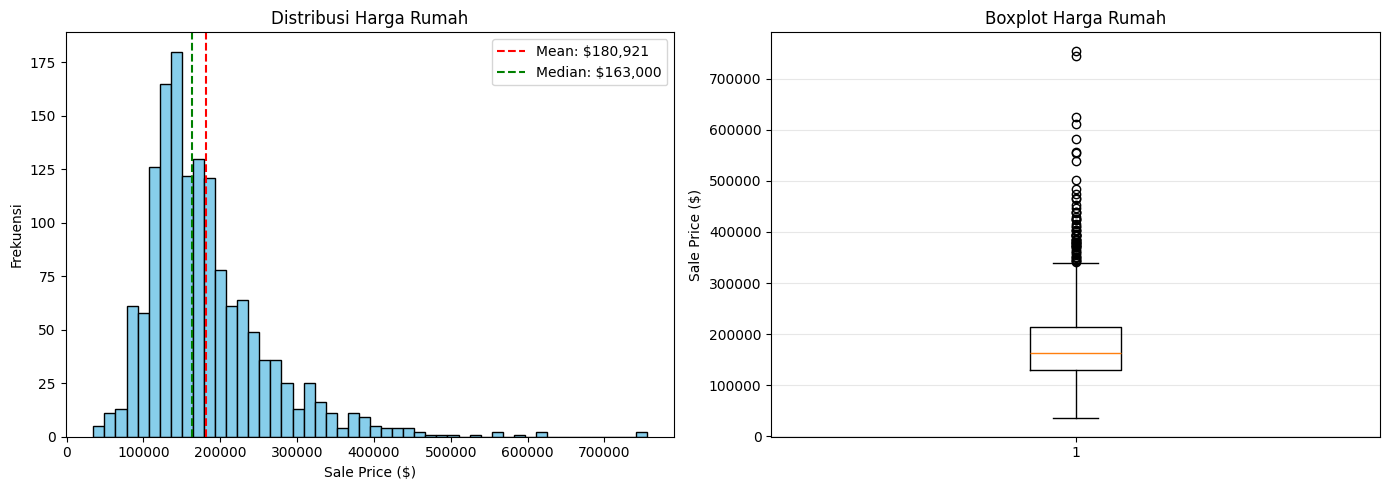

Mean: $180,921.20
Median: $163,000.00
Min: $34,900.00
Max: $755,000.00

Korelasi Fitur dengan SalePrice:

Top 10 Fitur dengan Korelasi Tertinggi:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


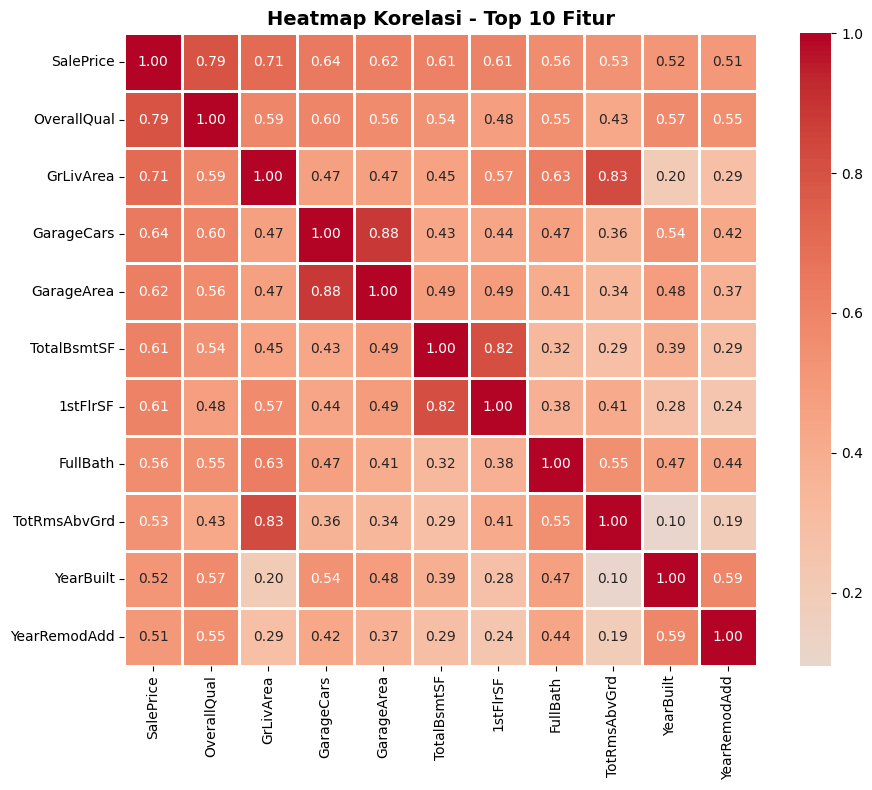


Hubungan Fitur Penting dengan Harga:


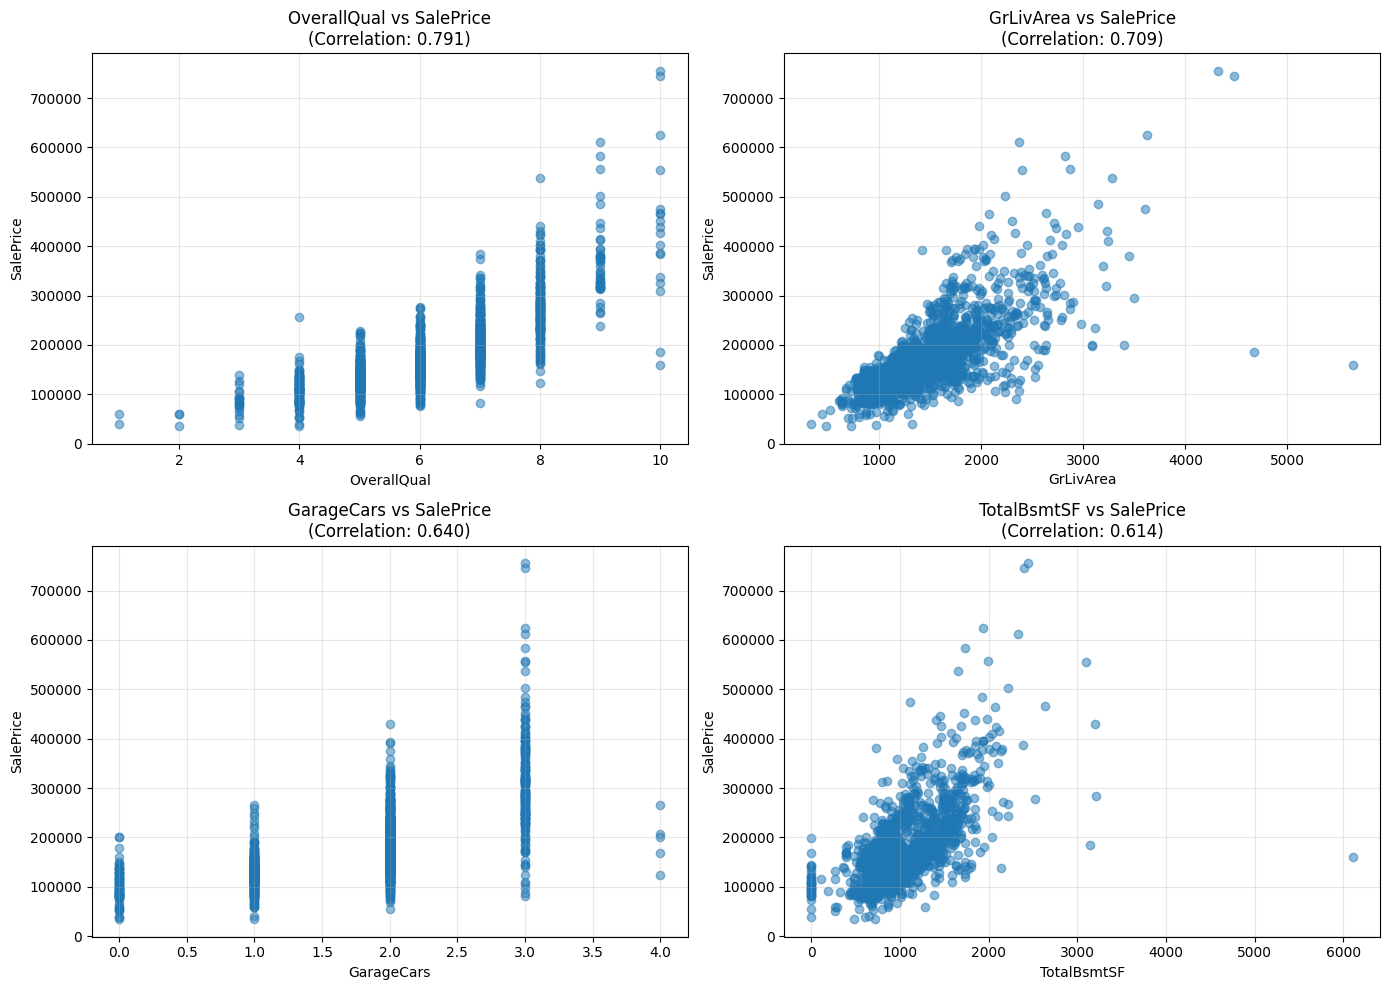


✓ Visualisasi EDA disimpan!


In [2]:
# ========================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ========================================

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

# Visualisasi Distribusi Target (SalePrice)
print("\nDistribusi Harga Rumah (SalePrice):")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['SalePrice'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Sale Price ($)')
axes[0].set_ylabel('Frekuensi')
axes[0].set_title('Distribusi Harga Rumah')
axes[0].axvline(df['SalePrice'].mean(), color='red', linestyle='--',
                label=f'Mean: ${df["SalePrice"].mean():,.0f}')
axes[0].axvline(df['SalePrice'].median(), color='green', linestyle='--',
                label=f'Median: ${df["SalePrice"].median():,.0f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['SalePrice'], vert=True)
axes[1].set_ylabel('Sale Price ($)')
axes[1].set_title('Boxplot Harga Rumah')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(output_path + '02_saleprice_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mean: ${df['SalePrice'].mean():,.2f}")
print(f"Median: ${df['SalePrice'].median():,.2f}")
print(f"Min: ${df['SalePrice'].min():,.2f}")
print(f"Max: ${df['SalePrice'].max():,.2f}")

# Korelasi dengan Target
print("\nKorelasi Fitur dengan SalePrice:")
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
print("\nTop 10 Fitur dengan Korelasi Tertinggi:")
print(correlations.head(11))

# Heatmap Korelasi (Top 10 Fitur)
plt.figure(figsize=(10, 8))
top_features = correlations.head(11).index
corr_matrix = numeric_df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Heatmap Korelasi - Top 10 Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(output_path + '03_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Scatter Plot: Fitur Penting vs SalePrice
print("\nHubungan Fitur Penting dengan Harga:")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

top_features_to_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
axes = axes.ravel()

for idx, feature in enumerate(top_features_to_plot):
    axes[idx].scatter(df[feature], df['SalePrice'], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('SalePrice')
    axes[idx].set_title(f'{feature} vs SalePrice\n(Correlation: {correlations[feature]:.3f})')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(output_path + '04_feature_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualisasi EDA disimpan!")

In [3]:
# ========================================
# DATA PREPROCESSING
# ========================================

print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Pilih fitur untuk model (fitur numerik yang penting)
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                     'FullBath', 'YearBuilt', 'LotArea', '1stFlrSF']

# Buat dataset baru dengan fitur terpilih
df_clean = df[selected_features + ['SalePrice']].copy()

print(f"\nFitur yang dipilih: {len(selected_features)} fitur")
for feat in selected_features:
    print(f"  • {feat}")

# Handle Missing Values (isi dengan median)
print("\nHandle Missing Values:")
print(f"Missing values sebelum: {df_clean.isnull().sum().sum()}")

for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
        print(f"  • {col}: diisi dengan median")

print(f"Missing values setelah: {df_clean.isnull().sum().sum()}")

# Remove Outliers pada SalePrice (menggunakan IQR)
print("\nRemove Outliers:")
Q1 = df_clean['SalePrice'].quantile(0.25)
Q3 = df_clean['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Data sebelum remove outliers: {len(df_clean)}")
df_clean = df_clean[(df_clean['SalePrice'] >= lower_bound) &
                    (df_clean['SalePrice'] <= upper_bound)]
print(f"Data setelah remove outliers: {len(df_clean)}")
print(f"Outliers yang dihapus: {len(df) - len(df_clean)}")

print("\nPreprocessing selesai!")


DATA PREPROCESSING

Fitur yang dipilih: 8 fitur
  • OverallQual
  • GrLivArea
  • GarageCars
  • TotalBsmtSF
  • FullBath
  • YearBuilt
  • LotArea
  • 1stFlrSF

Handle Missing Values:
Missing values sebelum: 0
Missing values setelah: 0

Remove Outliers:
Data sebelum remove outliers: 1460
Data setelah remove outliers: 1399
Outliers yang dihapus: 61

Preprocessing selesai!


In [4]:
print("\n" + "="*70)
print("PERBANDINGAN MODEL REGRESI")
print("="*70)

# Prepare Data
X = df_clean[selected_features]
y = df_clean['SalePrice']

print(f"\nData untuk Training:")
print(f"Jumlah fitur (X): {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Target: SalePrice")

# Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nSplit Data:")
print(f"Training set: {X_train.shape[0]} sampel (80%)")
print(f"Testing set: {X_test.shape[0]} sampel (20%)")

# Define 3 Models
print("\nMODEL YANG AKAN DIBANDINGKAN:")
print("-" * 70)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

justifikasi = {
    'Linear Regression':
        'Model regresi yang mencari hubungan linear antara fitur dan target',
    'Ridge Regression':
        'Linear regression dengan regularisasi untuk menghindari overfitting',
    'Random Forest':
        'Ensemble method yang menggabungkan banyak decision trees untuk prediksi lebih akurat'
}

for name in models.keys():
    print(f"\n✓ {name}")
    print(f"  → {justifikasi[name]}")

# Train dan Evaluate Models
print("\n" + "="*70)
print("TRAINING & EVALUASI MODEL")
print("="*70)

results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    results[name] = {
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Predictions': y_pred_test,
        'Model': model
    }

    print(f"  ✅ Selesai!")
    print(f"     Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"     Test RMSE: ${test_rmse:,.2f}")
    print(f"     Test MAE: ${test_mae:,.2f}")


PERBANDINGAN MODEL REGRESI

Data untuk Training:
Jumlah fitur (X): 8
Jumlah sampel: 1399
Target: SalePrice

Split Data:
Training set: 1119 sampel (80%)
Testing set: 280 sampel (20%)

MODEL YANG AKAN DIBANDINGKAN:
----------------------------------------------------------------------

✓ Linear Regression
  → Model regresi yang mencari hubungan linear antara fitur dan target

✓ Ridge Regression
  → Linear regression dengan regularisasi untuk menghindari overfitting

✓ Random Forest
  → Ensemble method yang menggabungkan banyak decision trees untuk prediksi lebih akurat

TRAINING & EVALUASI MODEL

🔄 Training Linear Regression...
  ✅ Selesai!
     Train R²: 0.7667 | Test R²: 0.8138
     Test RMSE: $24,335.18
     Test MAE: $18,095.95

🔄 Training Ridge Regression...
  ✅ Selesai!
     Train R²: 0.7667 | Test R²: 0.8139
     Test RMSE: $24,329.25
     Test MAE: $18,080.23

🔄 Training Random Forest...
  ✅ Selesai!
     Train R²: 0.9771 | Test R²: 0.8194
     Test RMSE: $23,967.83
     Test MA


TEMUAN & INTERPRETASI

TABEL HASIL PERBANDINGAN MODEL:
----------------------------------------------------------------------
            Model  Train R²  Test R²    Test RMSE     Test MAE
    Random Forest  0.977076 0.819400 23967.825231 17114.863879
 Ridge Regression  0.766724 0.813912 24329.246461 18080.225862
Linear Regression  0.766740 0.813821 24335.177097 18095.954035

MODEL TERBAIK: Random Forest
   • R² Score: 0.8194 (81.94%)
   • RMSE: $23,967.83
   • MAE: $17,114.86


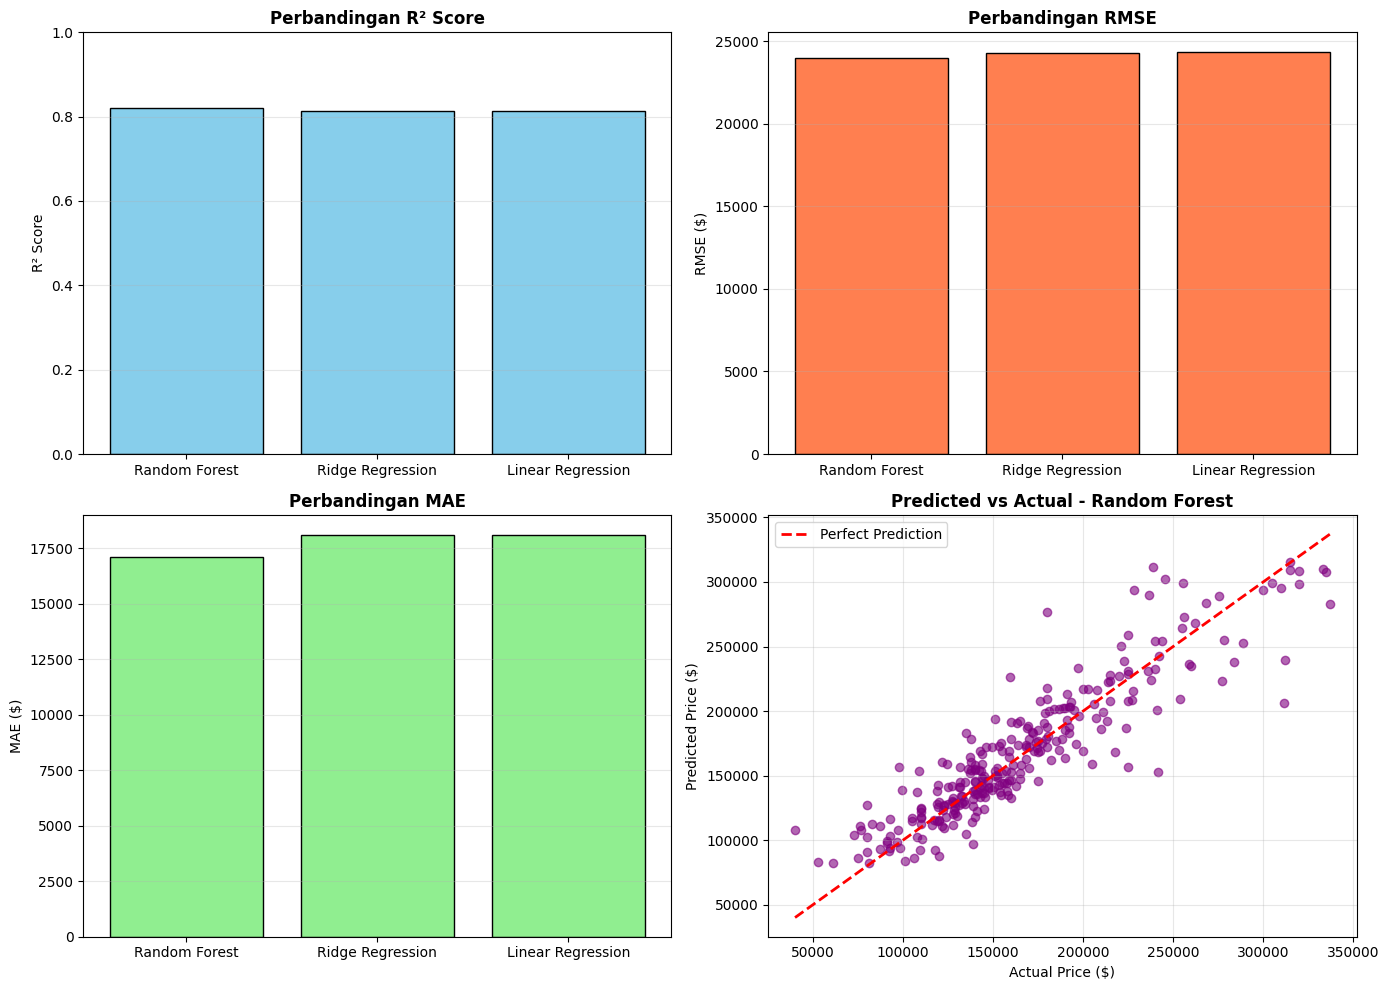


FEATURE IMPORTANCE (Random Forest):
----------------------------------------------------------------------
    Feature  Importance
OverallQual    0.556909
  GrLivArea    0.166758
TotalBsmtSF    0.090381
    LotArea    0.061595
  YearBuilt    0.055356
   1stFlrSF    0.037025
 GarageCars    0.025403
   FullBath    0.006572


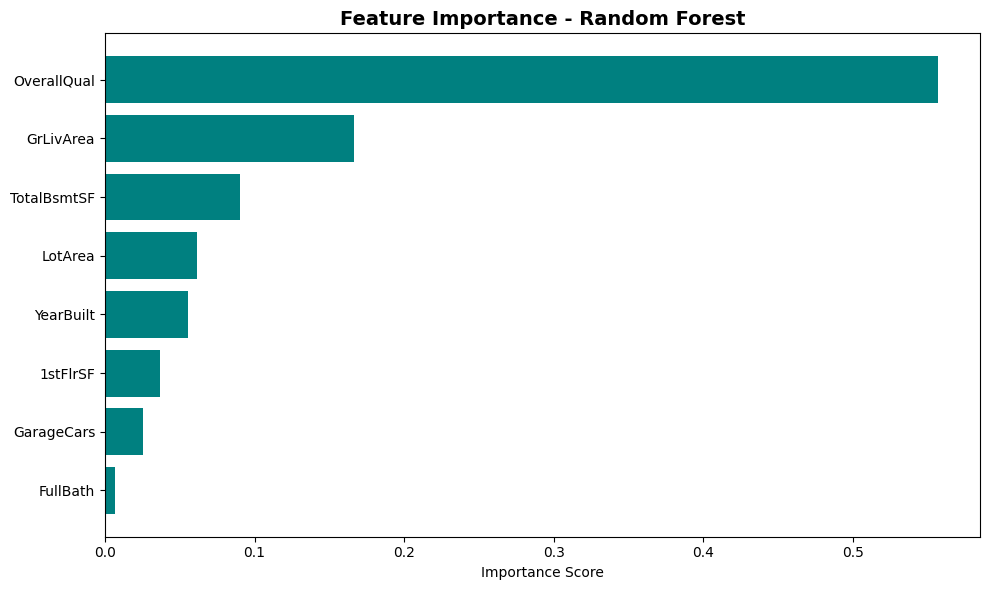


RESIDUAL ANALYSIS (Model Terbaik):
----------------------------------------------------------------------


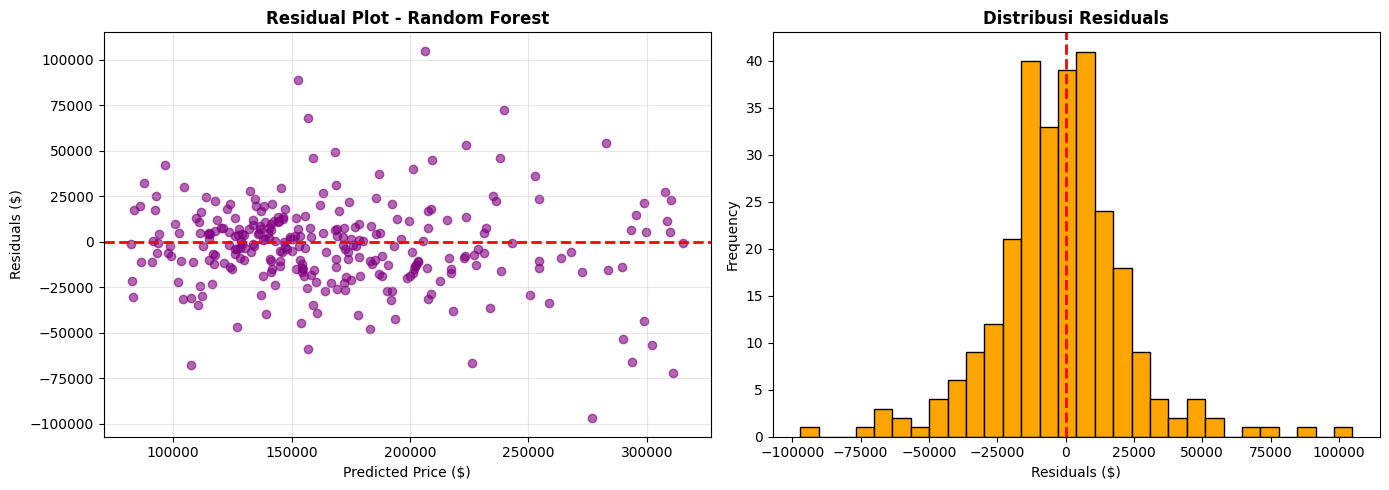

Mean Residual: $-2,181.94
Std Residual: $23,911.04

SEMUA HASIL TELAH DISIMPAN!
Lokasi output: D:\coursera-assigment\Course 2 - SL Regresi\result\

File yang tersimpan:
  ✓ 01_missing_values.png
  ✓ 02_saleprice_distribution.png
  ✓ 03_correlation_heatmap.png
  ✓ 04_feature_vs_price.png
  ✓ 05_model_comparison.png
  ✓ 06_feature_importance.png
  ✓ 07_residual_analysis.png
  ✓ model_comparison_results.csv
  ✓ feature_importance_rf.csv


In [5]:
# ========================================
# TEMUAN & INTERPRETASI
# ========================================

print("\n" + "="*70)
print("TEMUAN & INTERPRETASI")
print("="*70)

# Tabel Hasil
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['Train R²'] for m in results.keys()],
    'Test R²': [results[m]['Test R²'] for m in results.keys()],
    'Test RMSE': [results[m]['Test RMSE'] for m in results.keys()],
    'Test MAE': [results[m]['Test MAE'] for m in results.keys()]
}).sort_values('Test R²', ascending=False)

print("\nTABEL HASIL PERBANDINGAN MODEL:")
print("-" * 70)
print(results_df.to_string(index=False))

# Model Terbaik
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['Test R²']
best_rmse = results_df.iloc[0]['Test RMSE']
best_mae = results_df.iloc[0]['Test MAE']

print(f"\nMODEL TERBAIK: {best_model_name}")
print(f"   • R² Score: {best_r2:.4f} ({best_r2*100:.2f}%)")
print(f"   • RMSE: ${best_rmse:,.2f}")
print(f"   • MAE: ${best_mae:,.2f}")

# Visualisasi Perbandingan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. R² Score Comparison
ax1 = axes[0, 0]
ax1.bar(results_df['Model'], results_df['Test R²'], color='skyblue', edgecolor='black')
ax1.set_ylabel('R² Score')
ax1.set_title('Perbandingan R² Score', fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)

# 2. RMSE Comparison
ax2 = axes[0, 1]
ax2.bar(results_df['Model'], results_df['Test RMSE'], color='coral', edgecolor='black')
ax2.set_ylabel('RMSE ($)')
ax2.set_title('Perbandingan RMSE', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. MAE Comparison
ax3 = axes[1, 0]
ax3.bar(results_df['Model'], results_df['Test MAE'], color='lightgreen', edgecolor='black')
ax3.set_ylabel('MAE ($)')
ax3.set_title('Perbandingan MAE', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# 4. Predicted vs Actual (Best Model)
ax4 = axes[1, 1]
best_predictions = results[best_model_name]['Predictions']
ax4.scatter(y_test, best_predictions, alpha=0.6, color='purple')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
ax4.set_xlabel('Actual Price ($)')
ax4.set_ylabel('Predicted Price ($)')
ax4.set_title(f'Predicted vs Actual - {best_model_name}', fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(output_path + '05_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance (untuk Random Forest)
if 'Random Forest' in results:
    print("\nFEATURE IMPORTANCE (Random Forest):")
    print("-" * 70)

    rf_model = results['Random Forest']['Model']
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(feature_importance.to_string(index=False))

    # Visualisasi
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='teal')
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Importance Score')
    plt.title('Feature Importance - Random Forest', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(output_path + '06_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

# Residual Analysis
print("\nRESIDUAL ANALYSIS (Model Terbaik):")
print("-" * 70)

residuals = y_test - best_predictions

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual Plot
axes[0].scatter(best_predictions, residuals, alpha=0.6, color='purple')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Price ($)')
axes[0].set_ylabel('Residuals ($)')
axes[0].set_title(f'Residual Plot - {best_model_name}', fontweight='bold')
axes[0].grid(alpha=0.3)

# Histogram Residuals
axes[1].hist(residuals, bins=30, color='orange', edgecolor='black')
axes[1].set_xlabel('Residuals ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribusi Residuals', fontweight='bold')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig(output_path + '07_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mean Residual: ${residuals.mean():,.2f}")
print(f"Std Residual: ${residuals.std():,.2f}")

# Simpan hasil summary ke CSV
results_df.to_csv(output_path + 'model_comparison_results.csv', index=False)
if 'Random Forest' in results:
    feature_importance.to_csv(output_path + 'feature_importance_rf.csv', index=False)

print("\n" + "="*70)
print("SEMUA HASIL TELAH DISIMPAN!")
print("="*70)
print(f"Lokasi output: {output_path}")
print("\nFile yang tersimpan:")
print("  ✓ 01_missing_values.png")
print("  ✓ 02_saleprice_distribution.png")
print("  ✓ 03_correlation_heatmap.png")
print("  ✓ 04_feature_vs_price.png")
print("  ✓ 05_model_comparison.png")
print("  ✓ 06_feature_importance.png")
print("  ✓ 07_residual_analysis.png")
print("  ✓ model_comparison_results.csv")
print("  ✓ feature_importance_rf.csv")
print("="*70)